In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [2]:
data = load_svmlight_file("Housing")
X_train, X_test, y_train, y_test = train_test_split(data[0].todense(), data[1], test_size=0.33, random_state=42)

In [3]:
b1 = np.ones(X_train.shape[0])
X_train = np.c_[X_train,b1]
b2 = np.ones(X_test.shape[0])
X_test = np.c_[X_test,b2]

In [4]:
rate = 0.1
iter = 100
dimension = X_train.shape[1]

In [5]:
#w = np.zeros(dimension)                   #全零初始化
w = np.random.normal(size = (dimension))   #正态分布初始化
G = np.zeros(dimension)
deviation_array = np.zeros(X_train.shape[0])

In [6]:
def linear_regression (X_train,y_train,X_test,y_test,w):   #L2 loss
    train_loss = np.zeros(iter)
    validation_loss = np.zeros(iter)
    for i in range(iter):
        #trainLoss
        deviation_train = y_train.reshape(y_train.shape[0],1) - np.dot(X_train, w.reshape(dimension,1))
        for j in range(deviation_train.shape[0]):
            train_loss[i] = train_loss[i] + deviation_train[j] ** 2
        train_loss[i] = train_loss[i] / deviation_train.shape[0]
        #validationLoss
        deviation_test = y_test.reshape(y_test.shape[0],1) - np.dot(X_test, w.reshape(dimension,1))
        for j in range(deviation_test.shape[0]):
            validation_loss[i] = validation_loss[i] + deviation_test[j] ** 2
        validation_loss[i] = validation_loss[i] / deviation_test.shape[0]
        #gradient descent
        G = -np.dot(deviation_train.reshape(1,deviation_train.shape[0]), X_train / X_train.shape[0])
        w = w - rate * G
    return train_loss,validation_loss

In [7]:
L_train, L_validation = linear_regression(X_train, y_train,X_test,y_test,w)

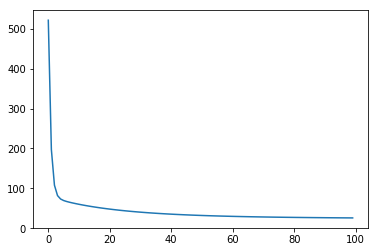

In [8]:
x = np.arange(iter)
plt.plot(x, L_train.tolist())
plt.show()

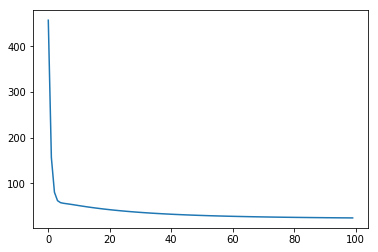

In [9]:
plt.plot(x, L_validation.tolist())
plt.show()